In [2]:
!pip install -q rasterio

     |████████████████████████████████| 19.3 MB 2.1 MB/s 


In [3]:
# Bibliotecas
import numpy as np
from skimage import exposure
from skimage.segmentation import mark_boundaries, felzenszwalb, slic, quickshift
import rasterio as rio
import matplotlib.pyplot as plt
import tifffile as tif

In [5]:
# Lendo imagem como array
src = rio.open('/content/drive/MyDrive/Curso PDI com Python/cubo_s2.tif')

list_band = [src.read(i+1) for i in range(src.count)]

img = np.dstack(list_band)

In [6]:
# Armazenando metadados da imagem original
meta = src.profile

In [8]:
# Reamostrando para valoers entre 0 e 1
img2 = exposure.rescale_intensity(img)

In [10]:
# Segmentadores
quick = quickshift(img2[:,:,:3].astype('double'), kernel_size=5, max_dist=1000,
                   ratio=0.1)
slic_ = slic(img2, n_segments=5000, compactness=0.1, sigma=1, start_label=1)
felzen = felzenszwalb(img2, scale=1, sigma=1, min_size=70)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RuntimeWarning: Got image with third dimension of 9. This image will be interpreted as a multichannel 2d image, which may not be intended.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
# Função de expansão
def expansao(img, percent_ini=2, percent_fim=98):
    s = np.zeros_like(img)
    x,y = 0,1
    w = np.percentile(img, percent_ini)
    z = np.percentile(img, percent_fim)        
    p = x + (img - w) * (y - x) / (z - w)    
    p[p<x] = x
    p[p>y] = y
    s = p
    return s

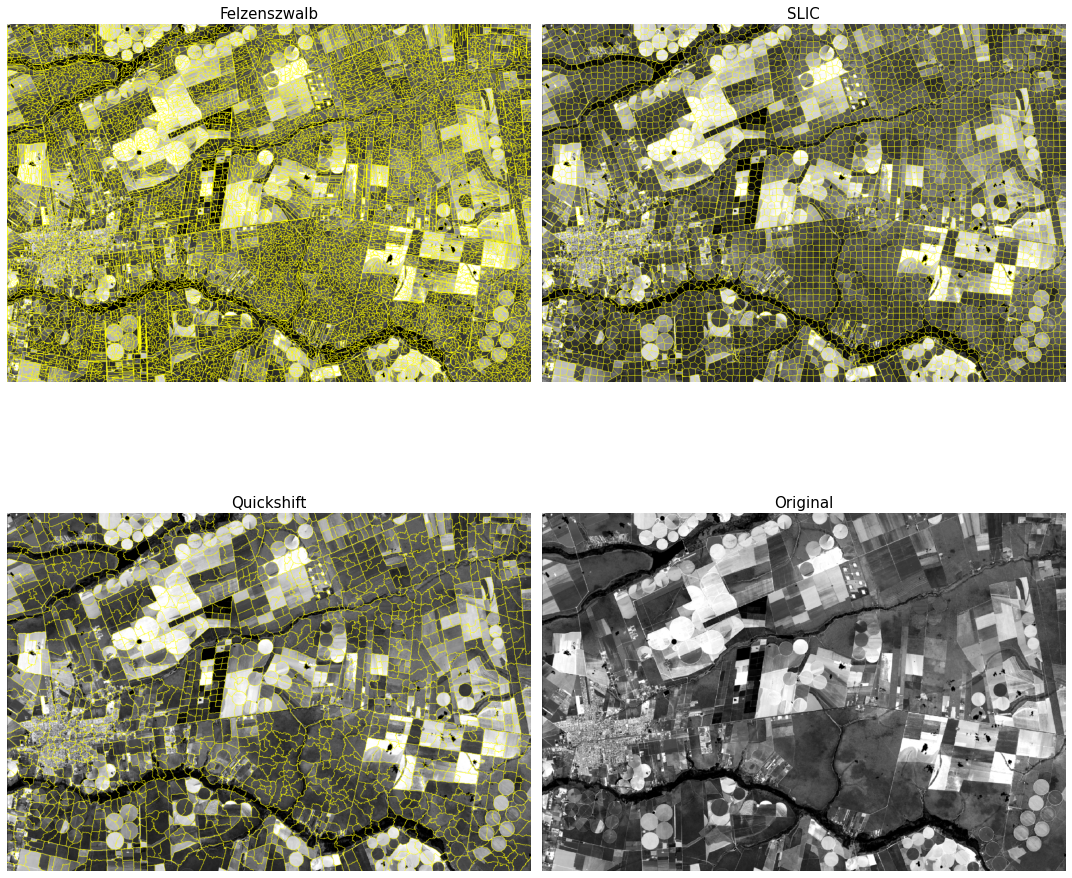

In [26]:
# Visualizando resultado
fig, ax = plt.subplots(2, 2, figsize=(15, 15), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(expansao(img2[:,:,7]), felzen))
ax[0, 0].set_title("Felzenszwalb", fontsize=15)
ax[0, 1].imshow(mark_boundaries(expansao(img2[:,:,7]), slic_))
ax[0, 1].set_title('SLIC', fontsize=15)
ax[1, 0].imshow(mark_boundaries(expansao(img2[:,:,7]), quick))
ax[1, 0].set_title('Quickshift', fontsize=15)
ax[1, 1].imshow(expansao(img2[:,:,7]), cmap="gray")
ax[1, 1].set_title('Original', fontsize=15)

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()